<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 20</b>: Árboles de decisión</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. Árboles de decisión](#arboles)
- [2. Terminología](#terminología)
- [3. Algoritmo](#algoritmo)
- [4. Hiperparámetros](#hiperparametros)
- [5. Ejemplo práctico](#ejemplo)
- [6. Links de interés](#links)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

## 1. Árboles de decisión <a name="arboles"></a>

<img src="https://drive.google.com/uc?export=view&id=1vD5G-fHz3vfVwcBbStAgmZ-dQOwIQ6wp" height="170" width="296" style="float: center;">

Un árbol de decisión (decision tree) es un modelo que permite resolver problemas tanto de **regresión** como de **clasificación**.

Por lo tanto se trata de un método de aprendizaje **supervisado** que se utiliza para predecir el valor de una variable objetivo basándose en varias variables de entrada.

La idea principal detrás de los árboles de decisión es dividir los datos en grupos cada vez más pequeños basándose en diferentes criterios hasta llegar a un resultado o decisión final.

Estos criterios se seleccionan de tal manera que los elementos de cada nodo sean lo más similares posibles entre sí.

#### Ventajas

- Interpretabilidad: Los árboles de decisión son fáciles de entender y visualizar.
- Manejo de datos categóricos y numéricos: Pueden trabajar con ambos tipos de datos sin necesidad de preprocesamiento extenso.
- No requiere normalización: No necesitan escalado de características.
- Captura relaciones no lineales: Pueden modelar relaciones complejas entre características y la variable objetivo.

### Desventajas

- Propensión al sobreajuste: Los árboles de decisión pueden sobreajustar los datos de entrenamiento si no se poda adecuadamente.
- Inestabilidad: Pequeñas variaciones en los datos pueden llevar a la construcción de árboles completamente diferentes.
- Eficiencia: Los árboles profundos pueden ser computacionalmente costosos y lentos de entrenar.

## 2. Terminología <a name="terminología"></a>

**Nodos de decisión**: representan una condición sobre una característica (atributo). Cada nodo divide los datos en subconjuntos basándose en un valor de la característica.

**Nodo raíz (root)**: contiene todos los datos.

**Hojas (leaf)**: representan la decisión final o la salida del modelo. En un problema de clasificación, las hojas representan clases; en un problema de regresión, representan valores numéricos.

**Ramas**: Representan el resultado de una condición y conectan nodos u hojas.

**Profundidad**: número máximo de nivelesdesde la raíz.

**Pureza**: un nodo es puro si todos sus datos pertenecen a una misma clase o tienen el mismo valor en la variable objetivo (regresión).

<img src="https://drive.google.com/uc?export=view&id=1xcAgFJlBN29DNohJNkQz2wwWkPGHSKBA" height="208" width="478" style="float: center;">

## 3. Algoritmo <a name="algoritmo"></a>

1. Selección de la característica: Se selecciona una característica (atributo) que divida mejor los datos.

  Según algún criterio como la ganancia de información (Information Gain) o el índice de Gini para medir la "pureza" de las divisiones.

2. División de los datos: Los datos se dividen en subconjuntos basados en la característica seleccionada.

3. Iteración: El proceso de selección de características y división de los datos se repite recursivamente para cada subconjunto hasta que se cumpla un criterio de parada.

  Los criterios de parada comunes incluyen:
  - Alcanzar una profundidad máxima del árbol.
  - Tener un número mínimo de muestras en un nodo.
  - No obtener una ganancia significativa al dividir más.

### **Ejemplo**

Imaginemos que estamos construyendo un árbol de decisión para decidir si debemos jugar al fútbol en función de las condiciones climáticas.

Tenemos los siguientes datos:

|   Clima  | Viento | ¿Jugar al fútbol? |
|:--------:|:------:|:-----------------:|
| Soleado  | Fuerte | No                |
| Lluvioso | Débil  | Sí                |
| Soleado  | Débil  | Sí                |
| Lluvioso | Fuerte | No                |

Empezamos con un único nodo que contiene todos los datos.

Necesitamos decidir cuál será nuestro primer criterio de división, es decir, cuál de las dos características (Clima o Viento) deberíamos usar para dividir los datos.

En este caso, por simplicidad, supongamos que decidimos dividir por Clima primero. Entonces, dividimos los datos en dos nodos hijos: uno para los días soleados y otro para los días lluviosos:

<img src="https://drive.google.com/uc?export=view&id=1Eqd79-Aczmssrv7g8mkyDTSnuYNCoGNz" height="175" width="399" style="float: center;">

Ahora tenemos dos nodos hijos, cada uno con una parte de los datos:

En el nodo "Soleado", tenemos los siguientes datos:

|   Clima  | Viento | ¿Jugar al fútbol? |
|:--------:|:------:|:-----------------:|
| Soleado  | Fuerte | No                |
| Soleado  | Débil  | Sí                |

En el nodo "Lluvioso", tenemos los siguientes datos:

|   Clima  | Viento | ¿Jugar al fútbol? |
|:--------:|:------:|:-----------------:|
| Lluvioso | Débil  | Sí                |
| Lluvioso | Fuerte | No                |

Cada uno de estos nodos hijos se divide de nuevo, esta vez en función de la velocidad del viento:

<img src="https://drive.google.com/uc?export=view&id=1SvksU0QwaCo68hmVY4G_deMgHlGXc34G" height="293" width="561" style="float: center;">

Cada uno de los nodos nodos hoja representa una decisión final basada en las condiciones climáticas.

En este caso queda un solo ejemplo por hoja.

Por ejemplo, si el clima es soleado y el viento es débil, la decisión es jugar al fútbol.

## 4. Hiperparámetros <a name="hiperparametros"></a>

Podemos construir un árbol de decisión utilizando la librería `scikit-learn` y las funciones `DecisionTreeClassifier` y `DecisionTreeRegressor`.

Algunos de sus hiperparámetros más importantes y los primeros en los que debemos centrarnos son:

**max_depth**: La profundidad máxima del árbol. Esto limita cuántas divisiones puede tener, lo cual es útil para prevenir el sobreajuste.

Si este valor es None, entonces los nodos se expanden hasta que las hojas sean puras o hasta que todas las hojas contengan menos muestras que `min_samples_split`.

**min_samples_split**: El número mínimo de muestras necesarias para dividir un nodo.

Si un nodo tiene menos muestras que min_samples_split, entonces no se dividirá, incluso aunque no sea puro. Ayuda a prevenir el sobreajuste.

**min_samples_leaf**: El número mínimo de muestras que debe haber en un nodo hoja. Un nodo se dividirá si al hacerlo se crean al menos min_samples_leaf muestras en cada uno de los hijos.

Esto también ayuda a prevenir el sobreajuste.

**max_features**: El número máximo de características a considerar al buscar la mejor división.

Si max_features es None, entonces se considerarán todas las características.

Reducir este número puede hacer que el modelo sea más simple y rápido de entrenar, pero también puede hacer que pase por alto algunas relaciones importantes.

**criterion**: La función para medir la calidad de una división. Dependiendo de la naturaleza del árbol (clasificador o regresor), las opciones varían.

Este hiperparámetro es el encargado de elegir qué variable se va a ramificar.

## 5. Ejemplo práctico <a name="ejemplo"></a>

#### Arbol de clasificación

Para ejemplificar la implementación de un **árbol de clasificación** utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

## Paso 1. Lectura del conjunto de datos procesado

## Paso 2. Selección de variables

In [2]:
X, y = load_iris(return_X_y = True, as_frame = True)

In [3]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [5]:
X.shape

(150, 4)

Siendo la clase `0` una `iris setosa`, la `1` una `iris versicolor` y la `2` una `iris virginica`.

In [6]:
y.unique()

array([0, 1, 2])

No es necesario que las variables predictoras estén normalizadas, ya que los árboles de decisión no se ven afectados por la escala de los datos debido a la forma en la que funcionan: toman decisiones basadas en ciertos umbrales de características, independientemente de su escala.

Una forma de visualizar la relación de las variables con el objetivo es utilizando un nuevo tipo de gráfico, el `parallel_coordinates`. Es una técnica de visualización de datos que se utiliza para trazar variables numéricas multivariadas:

<Axes: >

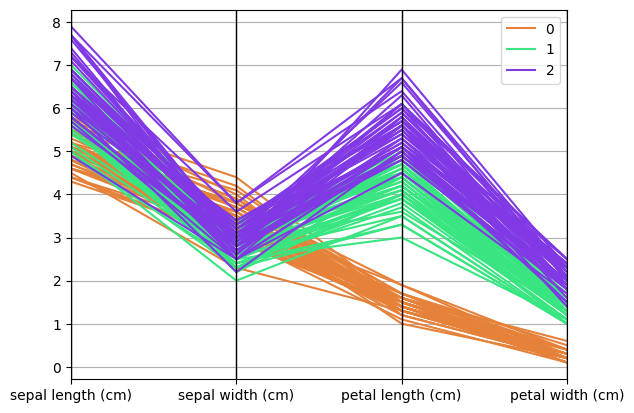

In [7]:
total_data = X
total_data["Name"] = y

pd.plotting.parallel_coordinates(total_data, "Name", color = ("#E58139", "#39E581", "#8139E5"))

Podemos apreciar cómo se reparten los valores de las predictoras en las distintas clases de flor

## Paso 3. Modelado

In [8]:
# modelo
model = DecisionTreeClassifier(random_state = 42)

# entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Una vez que el modelo se ha entrenado correctamente, podemos visualizar el árbol con la misma librería.

Esta visualización representa todos los pasos que ha seguido el modelo hasta la construcción del árbol. Además, se hace por niveles y de izquierda a derecha:

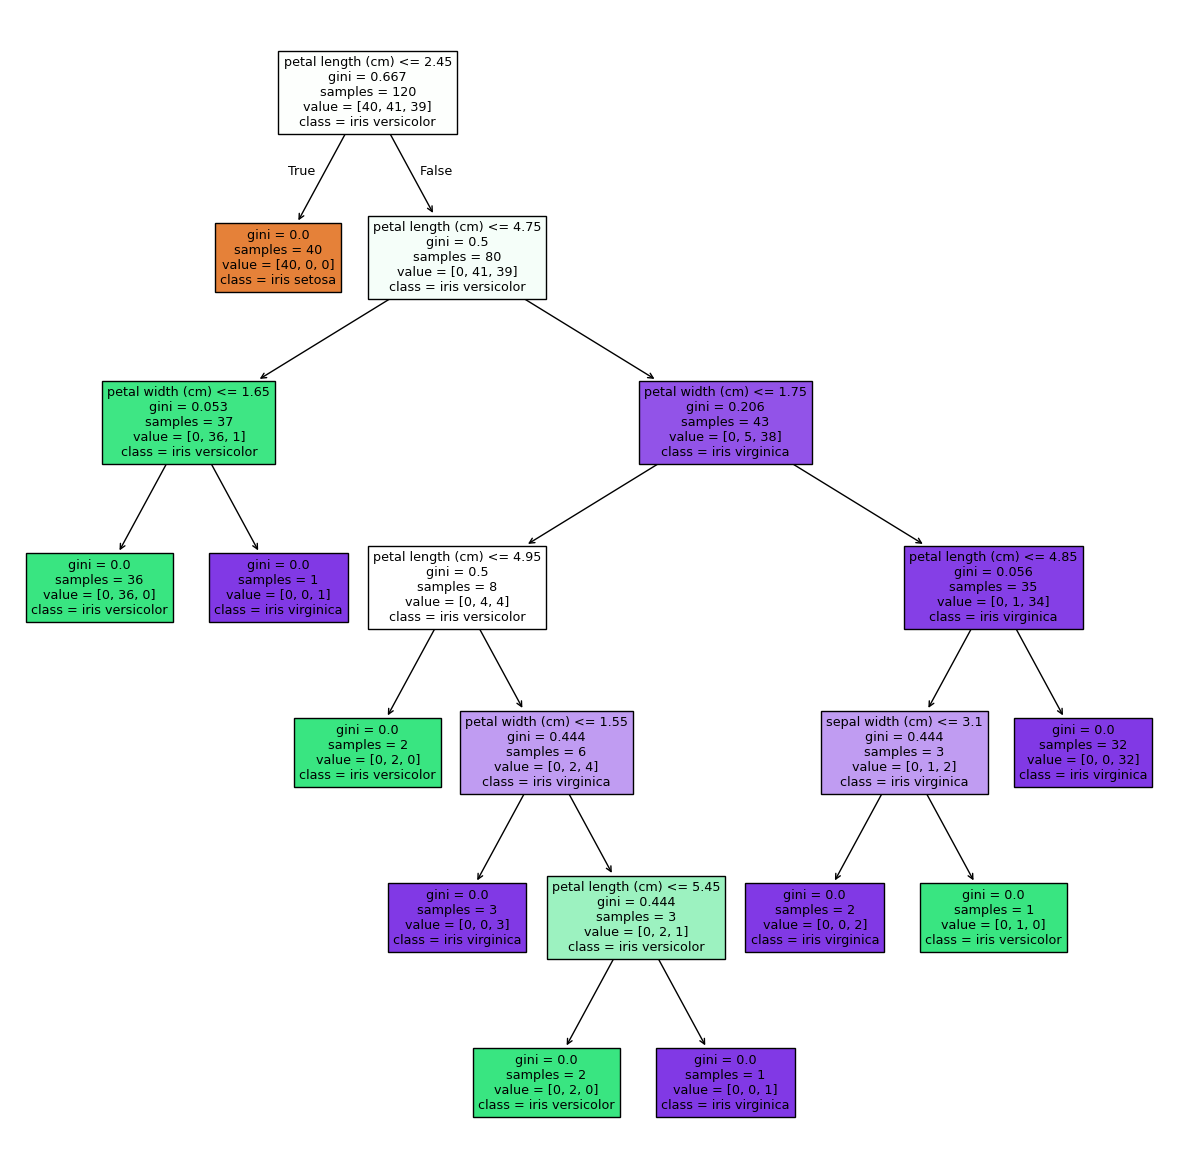

In [9]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["iris setosa", "iris versicolor", "iris virginica"], filled = True)

plt.show()

El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la tipología de modelo y su configuración.

In [10]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [11]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [14]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)


Accuracy Test:  1.0
F1 score Test:  1.0
Precision Test:  1.0
Recall Test:  1.0
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


Es importante considerar que este dataset es un problema de clasificación multiclase con tres clases (setosa, versicolor y virginica).

Al evaluar algunas metricas en un escenario multiclase, hay varias formas de promediar los resultados, siendo las más comunes "micro", "macro" y "weighted".

- Micro Average: Es útil cuando las clases tienen un tamaño similar y cuando quieres tener en cuenta todas las instancias por igual.
- Macro Average: Es adecuado cuando se quiere evaluar el rendimiento del modelo en cada clase de forma independiente y las clases son igualmente importantes.
- Weighted Average: Es ideal cuando las clases están desequilibradas y se quiere tener en cuenta el tamaño de cada clase en la evaluación global.

In [15]:
print(classification_report(y_test, y_pred_test, target_names=["iris setosa", "iris versicolor", "iris virginica"]))

                 precision    recall  f1-score   support

    iris setosa       1.00      1.00      1.00        10
iris versicolor       1.00      1.00      1.00         9
 iris virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



¡El modelo es perfecto!

## Paso 4. Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo.

In [16]:
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

#### Arbol de regresión

Para ejemplificar la implementación de un árbol de regresión utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

## Paso 1. Lectura del conjunto de datos procesado

In [17]:
# conexion drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
archivo = '/content/drive/MyDrive/4Geeks/cursadas/ds_pt_8/data/clean_petrol_consumption_train.csv'
train_data = pd.read_csv(archivo)

train_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,8.0,4447,8577,0.529,464
1,7.5,4870,2351,0.529,414
2,8.0,5319,11868,0.451,344
3,7.0,4345,3905,0.672,968
4,7.5,3357,4121,0.547,628


In [30]:
train_data.shape

(38, 5)

In [19]:
archivo = '/content/drive/MyDrive/4Geeks/cursadas/ds_pt_8/data/clean_petrol_consumption_test.csv'
test_data = pd.read_csv(archivo)

test_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,7.5,3846,9061,0.579,631
1,7.0,4449,4639,0.626,587
2,8.0,3448,5399,0.548,577
3,7.0,3745,2611,0.508,591
4,8.5,4574,2619,0.551,460


## Paso 2. Selección de variables

In [20]:
X_train = train_data.drop(["Petrol_Consumption"], axis = 1)
y_train = train_data["Petrol_Consumption"]

X_test = test_data.drop(["Petrol_Consumption"], axis = 1)
y_test = test_data["Petrol_Consumption"]

## Paso 3. Modelado

In [21]:
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
y_pred_test = model.predict(X_test)
y_pred_test

array([603., 632., 580., 714., 510., 644., 414., 968., 580., 541.])

In [23]:
# metricas
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("MSE Test: ", mse_test)
print("RMSE Test: ", rmse_test)

MSE Test:  17347.7
RMSE Test:  131.7106677532234


In [28]:
model_20 = DecisionTreeRegressor(random_state = 42, max_depth=4)
model_20.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [29]:
y_pred_test_20 = model_20.predict(X_test)
y_pred_test_20

# metricas
mse_test_20 = mean_squared_error(y_test, y_pred_test_20)
rmse_test_20 = np.sqrt(mse_test_20)

print("MSE Test: ", mse_test_20)
print("RMSE Test: ", rmse_test_20)

MSE Test:  16168.191206611573
RMSE Test:  127.15420247326304


## Paso 4. Guardado del modelo

In [ ]:
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))

## 61. Links de interés <a name="links"></a>

- [Decision Trees in Machine Learning](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)
- [Arboles con SkLearn](https://scikit-learn.org/stable/modules/tree.html)
- [Decision Tree](https://www.geeksforgeeks.org/decision-tree/)